#Blaze Anticipation

###Challenge Overview

 Wildfires pose a significant threat to communities, ecosystems, and human lives worldwide. Despite various efforts to combat and manage wildfires, predicting their occurrence with accuracy remains a challenging task. The current lack of a reliable and advanced fire prediction system leaves communities vulnerable to the devastating impacts of uncontrolled wildfires.

 Existing methods of fire prediction often rely on traditional models that may not adequately incorporate the complexity of environmental factors influencing wildfire behavior. This gap in predictive capabilities can lead to delayed or inaccurate warnings, hindering timely evacuation efforts and firefighting responses.

 To address this critical issue, the development of an innovative fire prediction system named "BlazeForecast" is proposed. BlazeForecast aims to leverage advanced machine learning algorithms to analyze a comprehensive set of environmental variables, including temperature, humidity, wind speed, and more. By harnessing the power of data-driven insights, the system aims to provide highly accurate and timely predictions of fire outbreaks.

The problem at hand involves the need for a more sophisticated and reliable fire prediction system that can:

 * Enhance Accuracy: Traditional methods often fall short in accurately predicting the onset and behavior of wildfires. BlazeForecast seeks to improve prediction accuracy by incorporating advanced machine learning algorithms and considering a wider range of environmental variables.

 * Timely Warnings: Existing systems may lack the speed required to issue timely warnings to communities at risk. BlazeForecast aims to provide early and precise predictions, enabling authorities to issue timely alerts and initiate evacuation plans.

 * Comprehensive Environmental Analysis: Conventional models may overlook critical environmental factors influencing wildfire dynamics. BlazeForecast seeks to conduct a thorough analysis of temperature, humidity, wind speed, and other relevant variables to develop a more holistic understanding of the fire risk landscape.

 * Community Safety: The ultimate goal is to safeguard communities from the devastating impact of wildfires. BlazeForecast aims to contribute to proactive wildfire management, reducing the risk of property damage, loss of life, and environmental degradation.

In summary, it's an innovative fire prediction system designed to safeguard communities from the threat of wildfires. Utilizing advanced machine learning algorithms, 'BlazeForecast' analyzes environmental factors such as temperature, humidity, wind speed, and more to provide accurate predictions of fire outbreaks.





### Dataset Information :

The dataset includes 10 key attribues and 1 output attribue (class) These fields represent environmental and meteorological features commonly used in predicting forest fires. Here's the meaning of each field:

* Temperature:

This is the air temperature in degrees Celsius. Higher temperatures can contribute to the drying of vegetation, increasing the risk of fires.

* Relative Humidity (RH):

RH represents the percentage of moisture in the air relative to the maximum amount the air could hold at that temperature. Low humidity levels make vegetation more susceptible to ignition.

* Wind Speed (Ws):

Wind speed is the rate at which air moves. Higher wind speeds can accelerate the spread of fires by carrying embers and flames.

* Rain:

This is the amount of rainfall in millimeters. Rainfall can help mitigate the risk of fires by wetting the vegetation.

* Fine Fuel Moisture Code (FFMC):

FFMC is a numeric rating of the moisture content of litter and other cured fine fuels. It is influenced by temperature, humidity, wind, and rainfall. Lower FFMC values indicate drier conditions.

* Duff Moisture Code (DMC):

DMC represents the moisture content of the upper organic layer (duff layer) in the soil. It is influenced by temperature and precipitation. Higher DMC values indicate drier conditions.

* Drought Code (DC):

DC is a numeric rating of the soil moisture content in the mineral soil. It reflects the long-term drought effects on the forest. Higher DC values indicate drier conditions.

*  Initial Spread Index (ISI):

ISI is a numeric rating of the expected rate of fire spread. It considers wind speed, FFMC, and the bui (Buildup Index). Higher ISI values indicate a higher potential for rapid fire spread.

* Buildup Index (BUI):

BUI is a numeric rating of the total amount of fuel available for combustion. It integrates DMC and DC values. Higher BUI values indicate a greater potential for intense and sustained fires.

* Fire Weather Index (FWI):

FWI is an overall rating of fire danger. It combines FFMC, DMC, DC, and ISI. Higher FWI values indicate increased fire danger. We evenly predict the FWI when its about using Linear Regression as it's of some continous values that is predictable as an output

* Class

It constitues of binary value whether its Fire or Not Fire, completely relies on the above 10 major factors.

> LINK TO THE DATASET : [Click Here](https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset)

### Data Cleansing and Visulaization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

data = pd.read_csv('wildfire.csv',nrows=235)

>**Query 1.  What insights can be derived from the statistical summary of the dataset, including measures of central tendency, variability, range, percentiles.**

In [2]:
data.describe()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,235.000000,235.000000,235.0,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,15.361702,7.442553,2012.0,32.319149,61.774468,15.506383,0.759149,78.153617,14.744681,49.566383,4.834043,16.755319,7.148085,0.480851
std,8.742336,1.093834,0.0,3.554859,14.939057,2.638263,2.018618,14.151739,12.471331,47.907866,4.183447,14.292013,7.469370,0.500700
min,1.000000,6.000000,2012.0,22.000000,21.000000,8.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,6.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.650000,5.800000,12.350000,1.450000,6.050000,0.800000,0.000000
50%,15.000000,7.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.100000,3.700000,12.500000,4.900000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.350000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,26.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


>**Query 2. Which rows in the DataFrame contain at least one missing value, and what action should be taken to handle these missing values?**

In [3]:
data[data.isnull().any(axis=1)]

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          235 non-null    int64  
 1   Month        235 non-null    int64  
 2   Year         235 non-null    int64  
 3   Temperature  235 non-null    int64  
 4    RH          235 non-null    int64  
 5    WS          235 non-null    int64  
 6   Rain         235 non-null    float64
 7   FFMC         235 non-null    float64
 8   DMC          235 non-null    float64
 9   DC           235 non-null    float64
 10  ISI          235 non-null    float64
 11  BUI          235 non-null    float64
 12  FWI          235 non-null    float64
 13  Region       235 non-null    int64  
 14  Classes      235 non-null    object 
dtypes: float64(7), int64(7), object(1)
memory usage: 27.7+ KB


> **Query 3. How is rainfall distributed throughout the dataset, and does it correlate with the occurrence of wildfires?**

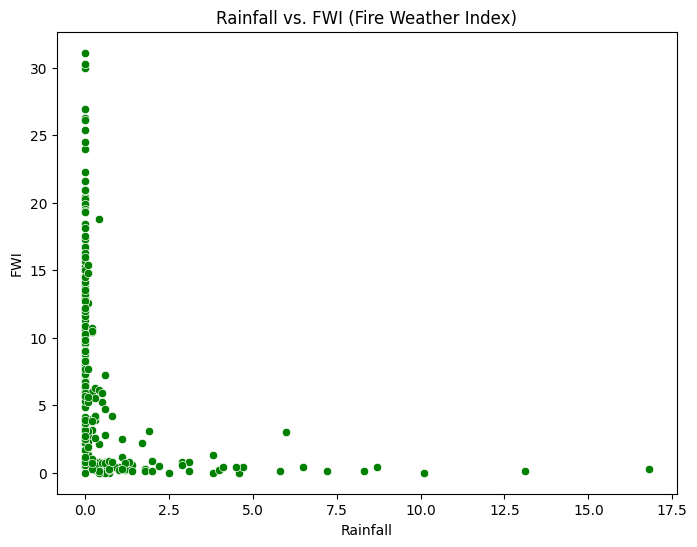

In [5]:
# Visualize the relationship between Rainfall and FWI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rain', y='FWI', data=data,color='green')
plt.title('Rainfall vs. FWI (Fire Weather Index)')
plt.xlabel('Rainfall')
plt.ylabel('FWI')
plt.show()

>**Query 4. What is the impact on model performance and interpretability when 'Day', 'Month', and 'Year' are dropped from the dataset, and should these temporal features be excluded for better model simplicity?**

In [6]:
df = data.drop(['Day','Month','Year'],axis=1)
df.sample(5)

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
78,36,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,0,fire
35,32,63,14,0.0,87.0,10.9,37.0,5.6,12.5,6.8,0,fire
138,31,69,17,4.7,62.2,3.9,8.0,1.1,3.8,0.4,1,not fire
201,35,66,15,0.1,82.7,32.7,96.8,3.3,35.5,7.7,1,fire
208,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1,fire


>**Query 5. What are the distributions of the Fire Weather Index (FWI), Initial Spread Index (ISI), Fine Fuel Moisture Code (FFMC), and other fire weather indices?**

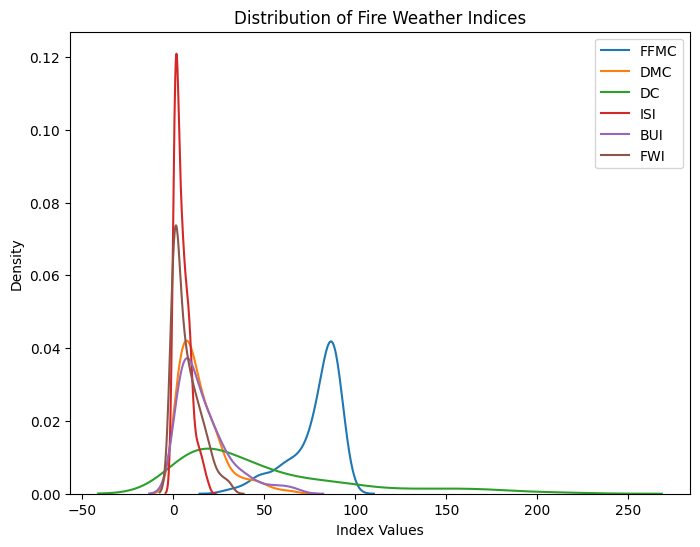

In [7]:
fwi_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
plt.figure(figsize=(8, 6))
for col in fwi_cols:
    sns.kdeplot(df[col], label=col)
plt.title('Distribution of Fire Weather Indices')
plt.xlabel('Index Values')
plt.ylabel('Density')
plt.legend()
plt.show()

>**Query 6. Perform encoding on the 'Classes' column in dfUpdated to represent 'not fire' as 0 and 'fire' as 1.**

In [8]:
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].str.strip()
x1 = df['Classes']
x1.value_counts()

Classes
fire        135
not fire    100
Name: count, dtype: int64

In [9]:
if 'Classes' not in df.columns or not np.issubdtype(df['Classes'].dtype, np.number):
    df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

df.sample(5)

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
58,32,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,0,1
174,31,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1,1
197,35,46,13,0.3,83.9,16.9,54.2,3.5,19.0,5.5,1,1
158,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,5.2,1,1
232,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1


> **Query 7. Show the distribution of categorical values among the predictive variable**

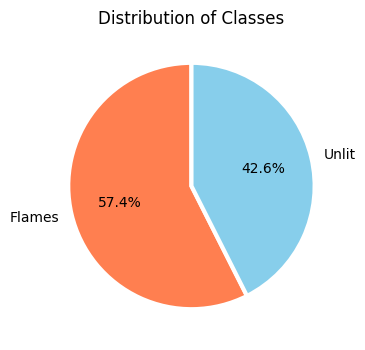

In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['Classes'].value_counts()

# Plotting the pie chart with a white line between the wedges
classlabels = ["Flames", "Unlit"]
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=classlabels, autopct='%1.1f%%', startangle=90, colors=['coral', 'skyblue'],
        wedgeprops=dict(edgecolor='white', linewidth=3))

plt.title('Distribution of Classes')
plt.show()

>**Query 8. What is the correlation matrix for the dataset, and how are the features, including the target variable, correlated with each other?**






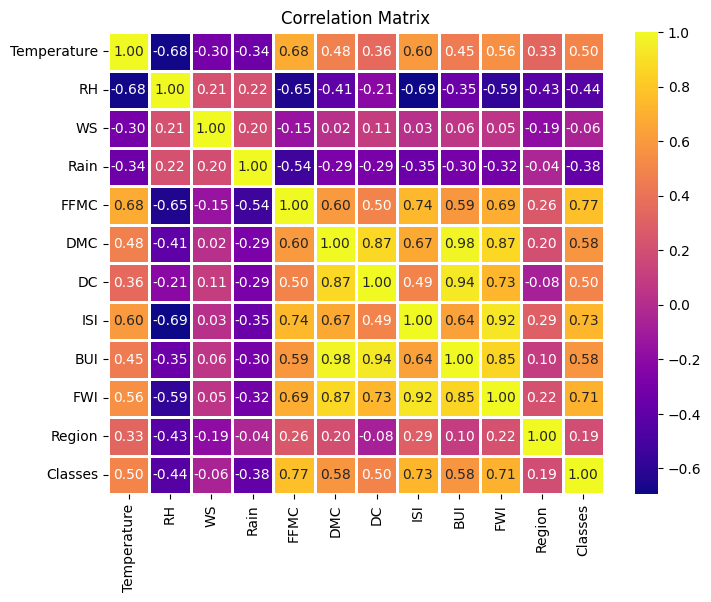

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f", linewidths=0.75)
plt.title('Correlation Matrix')
plt.show()

>**Query 9.  Check for a seasonal patterns in rainfall based on the peaks and troughs**

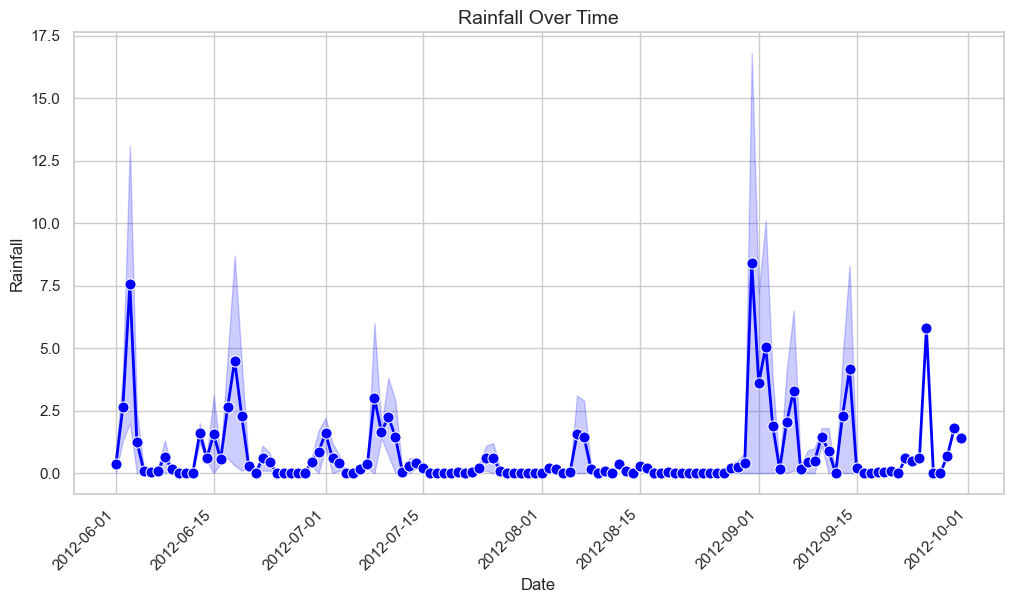

In [12]:

import seaborn as sns

# Assuming 'df' is your DataFrame
df_time = df.set_index(pd.to_datetime(data[['Day', 'Month', 'Year']]))

# Set style for seaborn
sns.set(style="whitegrid")

# Create a line plot with better visual representation
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x=df_time.index, y='Rain', linewidth=2, marker='o', markersize=8, color='blue')

# Customize the plot
plt.title('Rainfall Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rainfall', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()


> **Query 10. Showcase the combined effects of the FFMC,DMC,DC & ISI over the FWI**

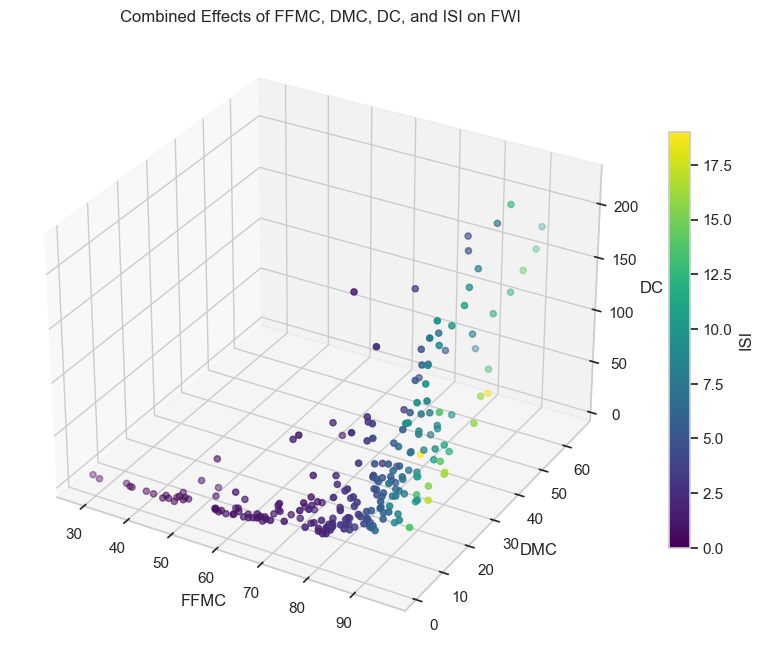

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['FFMC'], df['DMC'], df['DC'], c=df['ISI'], cmap='viridis', s=20, label='ISI')
ax.set_xlabel('FFMC')
ax.set_ylabel('DMC')
ax.set_zlabel('DC')
ax.set_title('Combined Effects of FFMC, DMC, DC, and ISI on FWI')

cbar = plt.colorbar(scatter,shrink=0.6)
cbar.set_label('ISI')

plt.show()

### Splitting and Standard Scaling of Data

> **Query 11. Perform the feature selection for the model, required to be scaled before model training**.

In [14]:
X = df.drop(["FWI","Classes"], axis=1)
Y = df["FWI"]

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=40)

> **Query 12. Check for the highly correlated features, and perform dropping**.

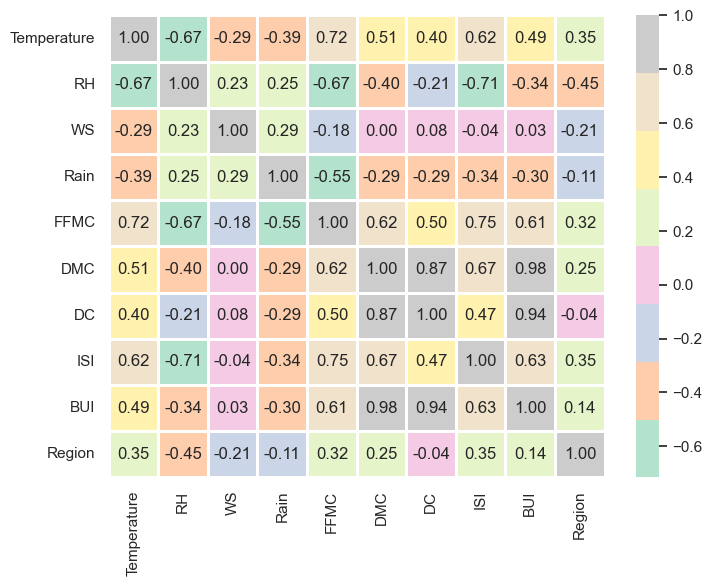

In [16]:
corr=X_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Pastel2', fmt=".2f", linewidths=0.75)
plt.show()

Highly correlated features can sometimes lead to multicollinearity issues in machine learning models. Multicollinearity can make it challenging for the model to understand the individual effect of each variable on the target variable. In such cases, dropping one of the highly correlated features can be a reasonable approach.

In [17]:
def cor(data, threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features=cor(X_train,0.90)
corr_features

{'BUI'}

In [19]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [20]:
X_train

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,Region
18,31,55,16,0.1,79.9,4.5,16.0,2.5,0
224,30,73,14,0.0,79.2,6.5,16.6,2.1,1
145,35,68,16,0.0,85.3,10.0,17.0,4.9,1
33,33,78,17,0.0,80.1,4.6,18.5,2.7,0
225,31,72,14,0.0,84.2,8.3,25.2,3.8,1
...,...,...,...,...,...,...,...,...,...
184,40,34,14,0.0,93.3,10.8,21.4,13.8,1
165,37,37,18,0.2,88.9,12.9,14.6,9.1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,0
219,34,71,14,6.5,64.5,3.3,9.1,1.0,1


In [21]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> **Query 13. Implement the Linear Regression technique, predicting the FWI value**.

### Linear Regression

In [22]:
LinearModel = LinearRegression()
LinearModel.fit(X_train_scaled, Y_train)

LinearRegression()

In [23]:
Y_pred=LinearModel.predict(X_test_scaled)

> **Query 14. Evaluate the accuracy of the model, also check for the mean absolute and squared error**.

In [24]:
mse = mean_squared_error(Y_test, Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
score=r2_score(Y_test,Y_pred)
Linear = score

print("Mean Absolute error :", mae)
print("Mean Squared Error : ", mse)
print("R2 Score :", score)

Mean Absolute error : 0.5762231134205335
Mean Squared Error :  0.7394607319438238
R2 Score : 0.9864479971802811


> **Query 15. Plot the graph visual, to showcase the difference between actual and predicted mean value**.

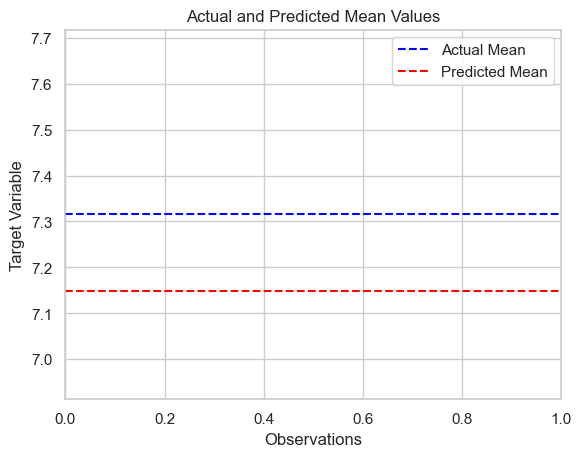

In [25]:
mean_test = np.mean(Y_test)
mean_pred = np.mean(Y_pred)
plt.axhline(mean_test, color='blue', linestyle='--', label='Actual Mean')
plt.axhline(mean_pred, color='red', linestyle='--', label='Predicted Mean')

plt.xlabel('Observations')
plt.ylabel('Target Variable')
plt.title('Actual and Predicted Mean Values')
plt.legend()

plt.show()

>**Query 16. Provide an interpretation of the intercept in the context of your regression model also find the coefficients**


In [26]:
intercept = LinearModel.intercept_
coefficients = LinearModel.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 7.092045454545456
Coefficients: [ 0.01553094 -0.04279539 -0.06914301  0.04986378 -0.65740344  2.98099307
  0.54249873  5.2141812  -0.31569055]


>**Query 17. What are the cross-validation scores and mean R-squared score of the linear regression model**

In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearModel, X, Y, cv=5, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
mean_r2_score = np.mean(cv_scores)
print("Mean R2 Score:", mean_r2_score)

Cross-Validation Scores: [0.98376897 0.96125766 0.9768064  0.86924868 0.97502312]
Mean R2 Score: 0.9532209679023198


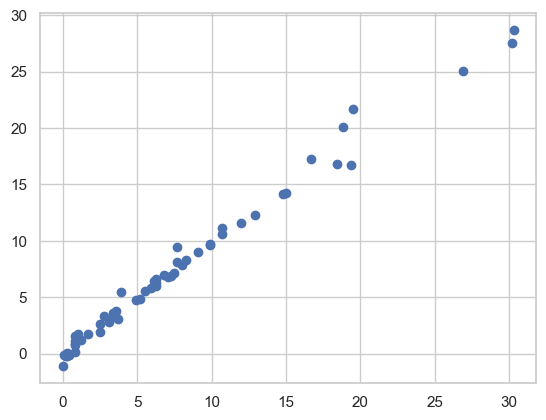

In [28]:
plt.scatter(Y_test,Y_pred)

### Random Forest Regressor

>**Query 18. Try to predict the FWI by using the Random Forest Regressor, and compare the performance metrics.**

In [29]:
from sklearn.ensemble import RandomForestRegressor
model_regressor = RandomForestRegressor(random_state=40)
model_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=40)

In [30]:
y_pred_rr = model_regressor.predict(X_test)

mse = mean_squared_error(Y_test, y_pred_rr)
mae=mean_absolute_error(Y_test,y_pred_rr)
score=r2_score(Y_test,y_pred_rr)

RandomForestRegressor = score

print("Mean Absolute error :", mae)
print("Mean Squared Error : ", mse)
print("R2 Score :", score)


Mean Absolute error : 0.658762711864407
Mean Squared Error :  1.2951816440677966
R2 Score : 0.9762633706778248


In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_regressor, X_train, Y_train, cv=5, scoring='r2')
mean_r2_score = np.mean(cv_scores)
print("Mean R2 Score:", mean_r2_score)
print("Cross-Validation Scores:", cv_scores)

Mean R2 Score: 0.969269473520314
Cross-Validation Scores: [0.97697255 0.98248266 0.98089906 0.96102521 0.94496789]


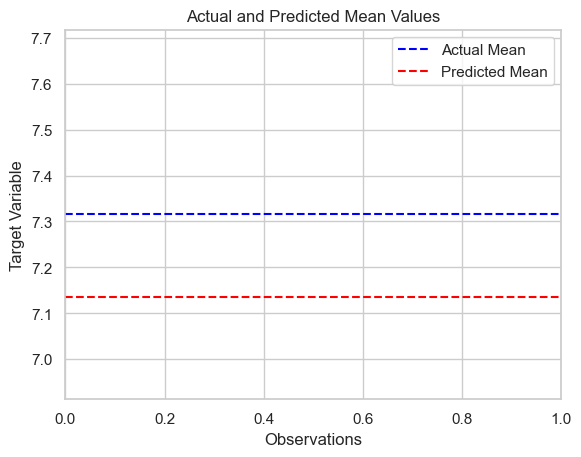

In [32]:
mean_test = np.mean(Y_test)
mean_pred = np.mean(y_pred_rr)
plt.axhline(mean_test, color='blue', linestyle='--', label='Actual Mean')
plt.axhline(mean_pred, color='red', linestyle='--', label='Predicted Mean')

plt.xlabel('Observations')
plt.ylabel('Target Variable')
plt.title('Actual and Predicted Mean Values')
plt.legend()

plt.show()

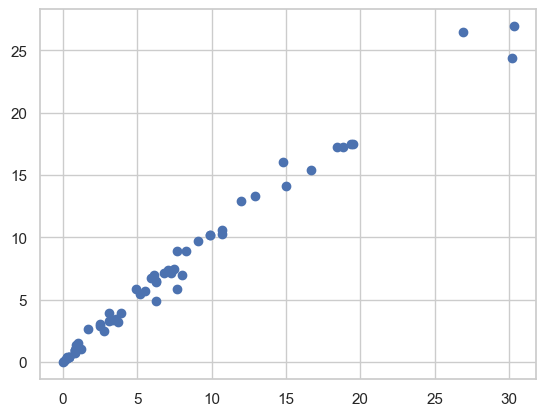

In [33]:
plt.scatter(Y_test,y_pred_rr)

### Logistic Regression

> **Query 19. Implement the Logistic Regression technique, predicting the Classes ' Fire ' , ' Not Fire '**.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


>**Query 20. Make use of Label Encoder to transform the classes into the values**

In [35]:
label = LabelEncoder()
target = label.fit_transform(df['Classes'])

y = target
original_classes = label.classes_
custom_labels = ['not fire', 'fire']
label.classes_ = custom_labels

features = ['Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI']

x = df[features]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(x, y, test_size=0.20, random_state=40)

modelLog = LogisticRegression(max_iter=1000)
modelLog.fit(X1_train, Y1_train)

y_pred = modelLog.predict(X1_test)

accuracy = accuracy_score(Y1_test, y_pred)
Logistic = accuracy
conf_matrix = confusion_matrix(Y1_test, y_pred)
classification_rep = classification_report(Y1_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9574468085106383

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.97      0.97      0.97        32

    accuracy                           0.96        47
   macro avg       0.95      0.95      0.95        47
weighted avg       0.96      0.96      0.96        47



>**Query 21. Aside of classification report, visualize the confusion matrix and elaborate the result**

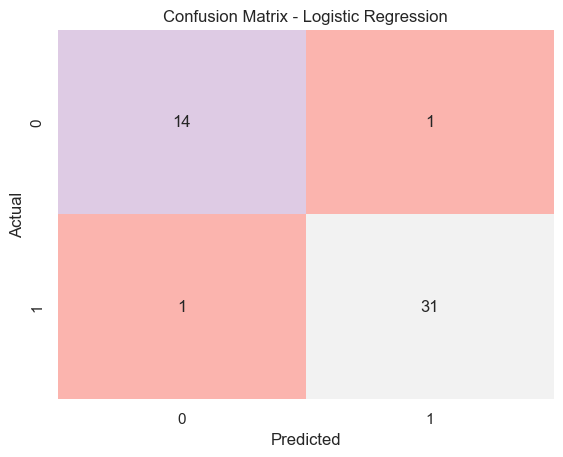

In [36]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(modelLog, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
mean_accuracy = cv_scores.mean()
m1 = mean_accuracy
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.9787234  0.91489362 0.93617021 1.         0.95744681]
Mean Accuracy: 0.9574468085106382


### Gaussian NB Classifier

> **Query 22. Implement the Naive Bayes Classification technique and other algorithms, compare the accuracy scores respectively**.

Naive Bayes Accuracy: 0.8936170212765957


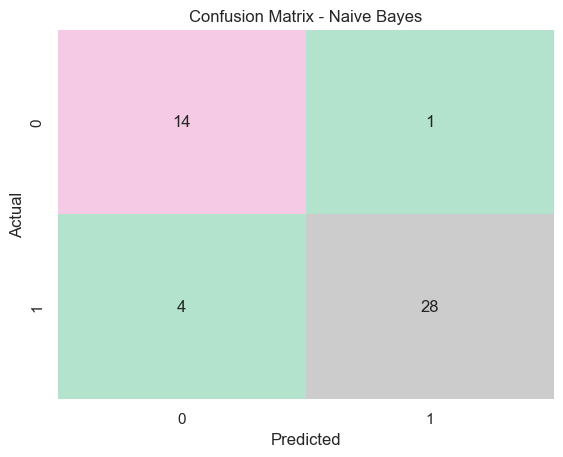


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.97      0.88      0.92        32

    accuracy                           0.89        47
   macro avg       0.87      0.90      0.88        47
weighted avg       0.91      0.89      0.90        47



In [38]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X1_train, Y1_train)

y_pred_nb = model_nb.predict(X1_test)

accuracy_nb = accuracy_score(Y1_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(Y1_test, y_pred_nb)
classification_rep_nb = classification_report(Y1_test, y_pred_nb)

NaiveBayes = accuracy_nb

print("Naive Bayes Accuracy:", accuracy_nb)


sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Pastel2', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nNaive Bayes Classification Report:")
print(classification_rep_nb)


In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_nb, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
mean_accuracy = cv_scores.mean()
m2 = mean_accuracy
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.91489362 0.89361702 0.93617021 1.         0.91489362]
Mean Accuracy: 0.9319148936170214


>**Query 23. Depicts the shape of the precision-recall curve indicate about the classifier's performance**

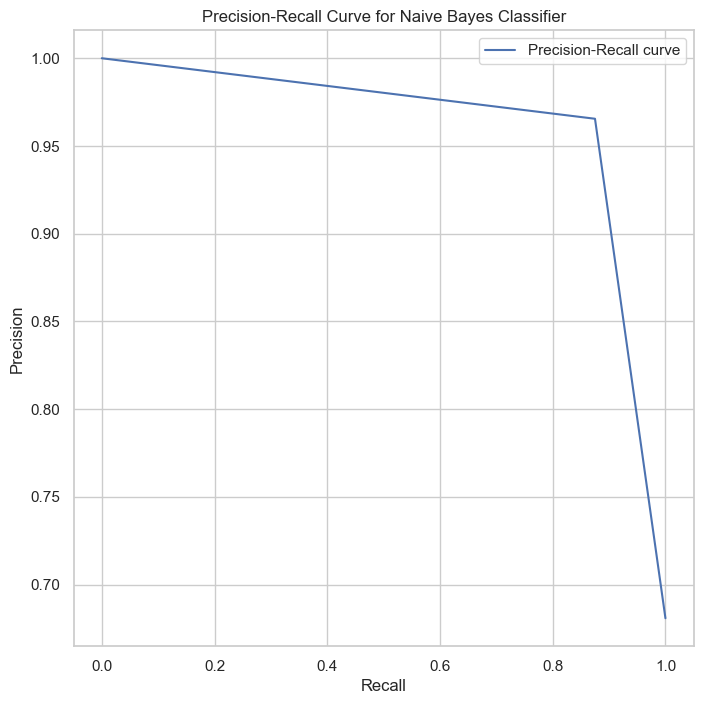

In [40]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(Y1_test, y_pred_nb)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes Classifier')
plt.legend()
plt.show()

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors as needed
model_knn.fit(X1_train, Y1_train)

# Predictions
y_pred_knn = model_knn.predict(X1_test)


# Evaluation
accuracy_knn = accuracy_score(Y1_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(Y1_test, y_pred_knn)
classification_rep_knn = classification_report(Y1_test, y_pred_knn)

KNN = accuracy_knn

print("KNN Accuracy:", accuracy_knn)
print("\nKNN Classification Report:")
print(classification_rep_knn)

KNN Accuracy: 0.9148936170212766

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.97      0.91      0.94        32

    accuracy                           0.91        47
   macro avg       0.90      0.92      0.91        47
weighted avg       0.92      0.91      0.92        47



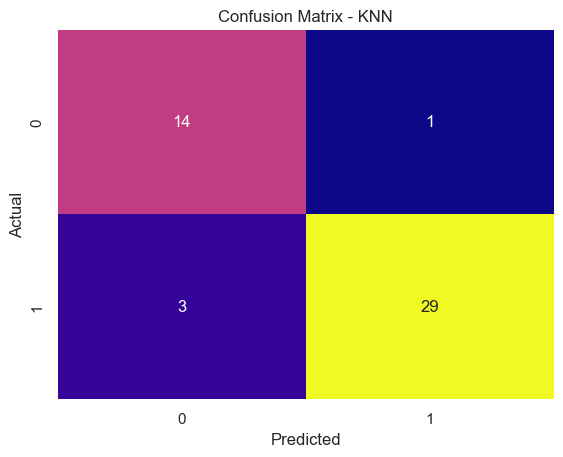

In [42]:
import seaborn as sns
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_knn, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
mean_accuracy = cv_scores.mean()
m3 = mean_accuracy
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.91489362 0.78723404 0.91489362 1.         0.89361702]
Mean Accuracy: 0.902127659574468


### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X1_train, Y1_train)

y_pred_rf = model_rf.predict(X1_test)

accuracy_rf = accuracy_score(Y1_test, y_pred_rf)

RandomForestClassifier = accuracy_rf

conf_matrix_rf = confusion_matrix(Y1_test, y_pred_rf)
classification_rep_rf = classification_report(Y1_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)

Random Forest Accuracy: 0.9787234042553191

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.97      1.00      0.98        32

    accuracy                           0.98        47
   macro avg       0.98      0.97      0.98        47
weighted avg       0.98      0.98      0.98        47



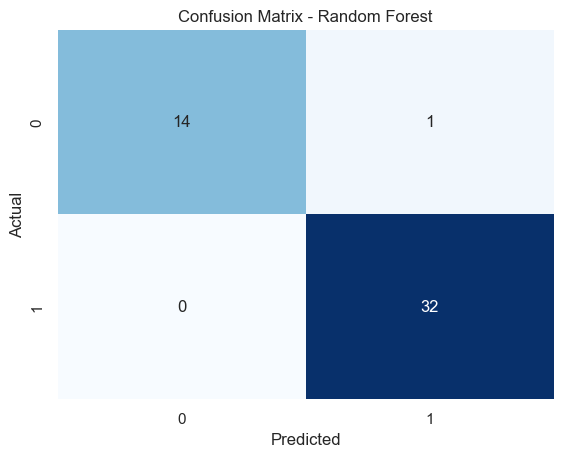

In [45]:
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

mean_accuracy = cv_scores.mean()
m4 = mean_accuracy
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.9787234  0.93617021 1.         1.         1.        ]
Mean Accuracy: 0.9829787234042552


>**Query 24.  Interpret the feature importance plot generated for the Random Forest Classifier**

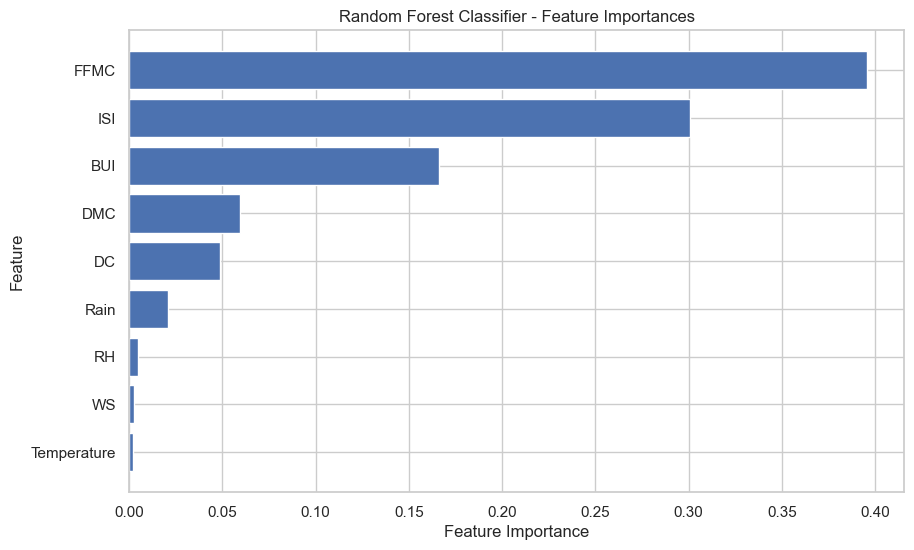

In [47]:
feature_importances = model_rf.feature_importances_

# Sort features by importance
sorted_indices = feature_importances.argsort()

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Classifier - Feature Importances")
plt.show()

>**Query 25. Interpret the positioning of the ROC curve with respect to the diagonal line**

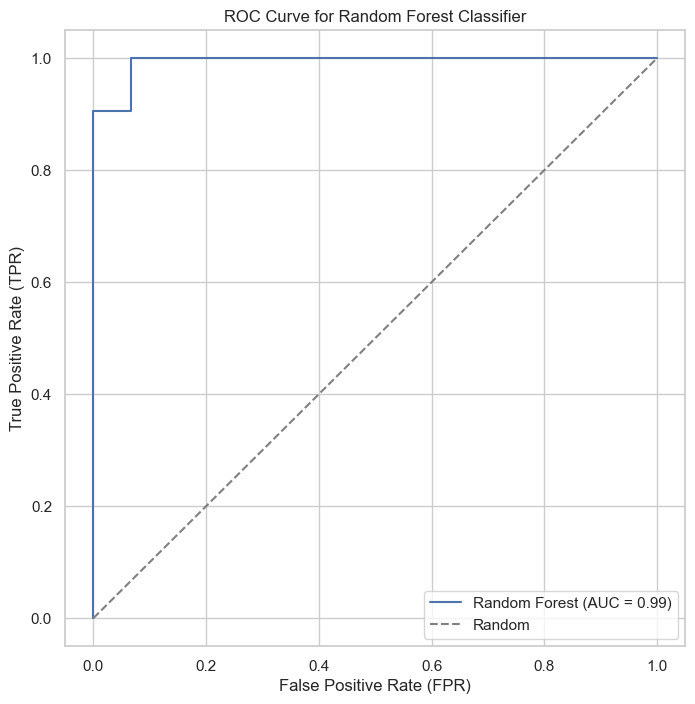

In [48]:
from sklearn.metrics import roc_curve, auc

Y1_pred_proba = model_rf.predict_proba(X1_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y1_test, Y1_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

### Conclusion

In [49]:
# Create a DataFrame
data = {
    'FWI - Model': ['Linear Regression', 'Random Forest Regressor'],
    'Accuracy Score': [Linear, RandomForestRegressor]
}
accuracy_df = pd.DataFrame(data,index=['I','II'])
accuracy_df

,FWI - Model,Accuracy Score
I,Linear Regression,0.986448
II,Random Forest Regressor,0.976263


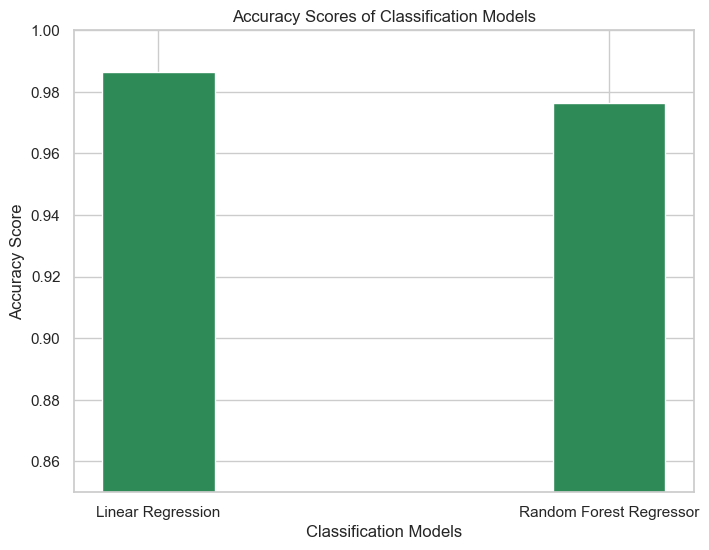

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['FWI - Model'], accuracy_df['Accuracy Score'], color='seagreen',width=0.25)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classification Models')
plt.ylim(0.85, 1.0)
plt.show()

Despite the competitive accuracy of the Linear Regression model, the decision to opt for the Random Forest Regressor stems from the latter's capacity to handle intricate, non-linear relationships within the data.

Linear Regression, while interpretable and computationally efficient, assumes a linear connection between features and the target, potentially limiting its efficacy on datasets with more complex patterns.

The Random Forest's ability to capture such nuances, coupled with its robustness to outliers, positions it as the more suitable choice for our regression task, prioritizing both interpretability and predictive performance

In [51]:
data_class = {
    'Classes Model': ['LogisticRegression', 'NaiveBayes', 'K-NearestNeighbors', 'RandomForestClassifier'],
    'Accuracy Score': [Logistic, NaiveBayes, KNN, RandomForestClassifier]
}
accuracy_df_class = pd.DataFrame(data_class,index=['I','II','III','IV'])
accuracy_df_class

,Classes Model,Accuracy Score
I,LogisticRegression,0.957447
II,NaiveBayes,0.893617
III,K-NearestNeighbors,0.914894
IV,RandomForestClassifier,0.978723


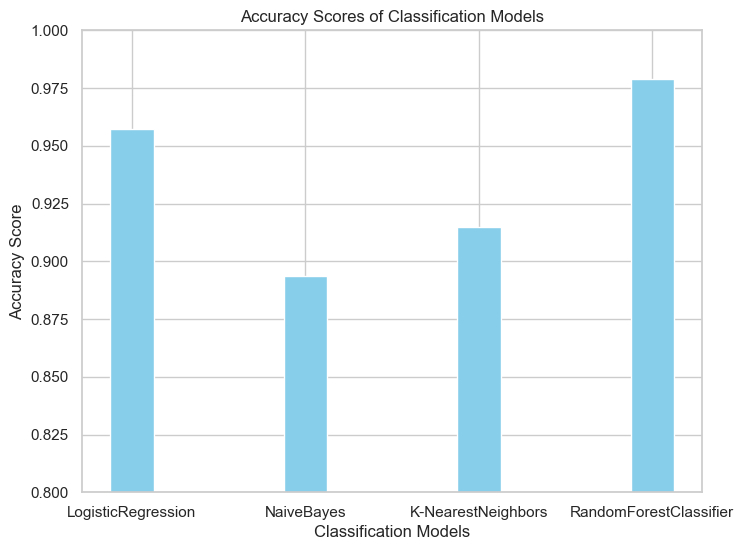

In [52]:
plt.figure(figsize=(8, 6))
plt.bar(accuracy_df_class['Classes Model'], accuracy_df_class['Accuracy Score'], color='skyblue',width=0.25)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Classification Models')
plt.ylim(0.8, 1.0)
plt.show()

The Random Forest Classifier stands out with the highest accuracy (97.87%), suggesting superior performance in this context.

> Recommendation:

This is recommended due to its high accuracy and robustness. Random Forest excels in capturing complex relationships in the data and is less prone to overfitting compared to individual decision trees. Its ensemble nature allows it to provide reliable predictions.

###Evaluations on Unseen Data

####FWI Predictions [Inferno Estimator]

In [53]:
import pickle

# Save the model using pickle
with open('estimator.pkl', 'wb') as file:
    pickle.dump(model_regressor, file)

# Load the model using pickle
with open('estimator.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [54]:

new_data = [24, 54, 18, 0.1, 79.7, 4.3, 15.2, 1.7, 1]
columns = ['Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI','Region']
df_new_data = pd.DataFrame([new_data],columns=columns)
# Make predictions on the new data using the loaded model
predictions = loaded_model.predict(df_new_data)

print("Predicted FWI Is :", predictions)

Predicted FWI Is : [1.198]


####Class Predictions [Inferno Classifier]

In [55]:
import pickle

# Save the model using pickle
with open('classifier.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

# Load the model using pickle
with open('classifier.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [56]:
new_data = [24, 54, 18, 0.1, 79.7, 4.3, 15.2, 1.7, 0.7]
columns = ['Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI']
df_new_data = pd.DataFrame([new_data], columns=columns)


predictions = loaded_model.predict(df_new_data)

predicted_class = label.classes_[predictions[0]]
print("Predicted Class:", predicted_class)

if predictions[0] == 1:
    print("\nNature seems to be clearing its throat with a symphony of dry leaves and crackling twigs.\nIts hinting at an imminent forest inferno")
else:
    print("\nNO need for fire extinguishers today...!\nThe predictor is telling us that the forest gets to relax without the worry of a fiery surprise")

Predicted Class: not fire

NO need for fire extinguishers today...!
The predictor is telling us that the forest gets to relax without the worry of a fiery surprise
